## Preprocesamiento de los datos

###**Consigna 1**
Leer los datos del archivo tabla nutricional.csv. Completar las celdas faltantes con ceros. Poner todos los datos en la misma unidad.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos del archivo
tabla_nutricional = pd.read_csv('datos/tabla_nutricional.csv', delimiter=';', index_col="Alimento")
tabla_nutricional.head()

,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (mg),Ca (mg),Fe (mg),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,,
Leche fluida entera,270.00,12.42,8.37,7.83,153.90,283.50,0.189,NaN,4.99,2.19,0.520,NaN
Leche entera en polvo,11.00,4.51,2.84,2.73,44.44,99.00,0.060,NaN,1.62,0.77,0.060,NaN
Yogurt,19.00,2.45,0.51,0.49,7.99,17.67,0.005,NaN,0.32,0.14,0.014,NaN
Queso crema,1.66,0.06,0.10,0.37,1.23,0.93,NaN,NaN,0.36,0.11,0.010,NaN
Queso cuartirolo,3.66,0.06,0.77,0.80,20.84,16.54,NaN,NaN,0.76,0.21,0.020,NaN


La tabla corresponde a la canasta básica, que es un conjunto de alimentos que satisfacen requerimientos nutricionales y que refleja los hábitos de consumo de los argentinos. Esta tabla nos brinda el contenido nutricional de los alimentos para un total de 2700 calorías diario.

Notamos que, en los casos en los que un alimento no posee algún nutriente, se los deja nulos en la tabla. Para hacer el análisis, preferimos que estén en 0. Además, nos interesa utilizar la misma unidad de medida para todos los nutrientes, por lo que convertimos las columnas de sodio, calcio y hierro a gramos. Por último, pasamos a letra minúscula toda la columna de alimentos para evitar inconsistencias.

In [3]:
tabla_nutricional = tabla_nutricional.fillna(0)
tabla_nutricional[['Na (mg)', 'Ca (mg)', 'Fe (mg)']] /= 1000
tabla_nutricional = tabla_nutricional.rename(columns={'Na (mg)': 'Na (g)', 'Ca (mg)': 'Ca (g)', 'Fe (mg)': 'Fe (g)'})
tabla_nutricional.index = tabla_nutricional.index.str.lower()

tabla_nutricional.head()

,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (g),Ca (g),Fe (g),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,,
leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0
leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0
yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0
queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0
queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0


###**Consigna 2**
Desarrollar una función que reciba como parametro un DataFrame y que evalue si las cantidades de los principales elementos de la dieta, proteinas, carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los margenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple. Verificar la Canasta Basica con esta función

In [4]:
# Definimos los grupos alimentarios
frutas = ['banana', 'manzana', 'tomate', 'naranja', 'mandarina', 'pera', 'tomate envasado']
verduras = ['acelga', 'zanahoria', 'lechuga', 'cebolla', 'zapallo']

def esta_dieta_balanceada(tabla_nutricional):
    """
    Evalúa si las cantidades de los principales elementos de la dieta, proteinas,
    carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los margenes de ingesta de la OMS

    Parámetros:
        tabla_nutricional: DataFrame que contiene la información nutricional de los alimentos, incluyendo la cantidad en gramos o mililitros.

    Devuelve:
        cumple (bool): Cumple los margenes de ingesta de la OMS
    """

    cumple = True

    frutas_tabla = tabla_nutricional.loc[frutas]
    verduras_tabla = tabla_nutricional.loc[verduras]
    # Conseguimos la cantidad consumida diariamente de cada nutriente a evaluar (HC, Proteinas, Grasas, etc)
    dieta = {'hc': tabla_nutricional['HC (gr)'].sum(),
         'prot' : tabla_nutricional['Proteinas (gr)'].sum(),
         'grasas': tabla_nutricional['Grasas (gr)'].sum(),
         'sodio': tabla_nutricional['Na (g)'].sum(),
         'fibra': tabla_nutricional['Fibra (gr)'].sum(),
         'frutas': frutas_tabla['Cantidad (gr/ml)'].sum(),
         'verduras': verduras_tabla['Cantidad (gr/ml)'].sum()}

    # Calculamos el porcentaje de cada grupo alimentario a partir de la relación entre
    # la suma de ese nutriente y la suma de los 3 grupos de nutrientes (HC, Grasas, Proteinas)
    porcentaje_hc = (dieta['hc'] / (dieta['hc'] + dieta['grasas'] + dieta['prot'])) * 100
    porcentaje_grasas = (dieta['grasas'] / (dieta['hc'] + dieta['grasas'] + dieta['prot'])) * 100
    porcentaje_prot = (dieta['prot'] / (dieta['hc'] + dieta['grasas'] + dieta['prot'])) * 100

    # Corroboramos que los porcentajes estén dentro de los margenes pedidos por la OMS
    if porcentaje_hc < 55 or porcentaje_hc > 75:
        print(f"Carbohidratos no cumple con los requerimientos de la OMS. Rango recomendado: 55% a 75% de la energía total. Valor obtenido: {porcentaje_hc}% de la energía total.")
        cumple = False
    if porcentaje_grasas < 15 or porcentaje_grasas > 30:
        print(f"Grasas no cumple con los requerimientos de la OMS. Rango recomendado: 15% a 30% de la energía total. Valor obtenido: {porcentaje_grasas}% de la energía total.")
        cumple = False
    if porcentaje_prot < 10 or porcentaje_prot > 15:
        print(f"Proteinas no cumple con los requerimientos de la OMS. Rango recomendado: 10% a 15% de la energía total. Valor obtenido: {porcentaje_prot}% de la energía total.")
        cumple = False

    if dieta['sodio'] > 2:
        print(f"Sodio no cumple con los requerimientos de la OMS. Rango recomendado: menos de 2 gramos. Valor obtenido: {dieta['sodio']} gramos.")
        cumple = False
    if dieta['fibra'] <= 25:
        print(f"Fibra no cumple con los requerimientos de la OMS. Rango recomendado: más de 25 gramos. Valor obtenido: {dieta['fibra']} gramos.")
        cumple = False
    if dieta['frutas'] + dieta['verduras'] < 400:
        print(f"Frutas y verduras no cumple con los requerimientos de la OMS. Rango recomendado: más de 400 gramos. Valor obtenido: {dieta['frutas'] + dieta['verduras']} gramos.")
        cumple = False

    return cumple

esta_dieta_balanceada(tabla_nutricional)

Grasas no cumple con los requerimientos de la OMS. Rango recomendado: 15% a 30% de la energía total. Valor obtenido: 12.827928527467689% de la energía total.
Proteinas no cumple con los requerimientos de la OMS. Rango recomendado: 10% a 15% de la energía total. Valor obtenido: 18.749280721330173% de la energía total.
Sodio no cumple con los requerimientos de la OMS. Rango recomendado: menos de 2 gramos. Valor obtenido: 3.337714 gramos.
Fibra no cumple con los requerimientos de la OMS. Rango recomendado: más de 25 gramos. Valor obtenido: 21.26 gramos.


False

##  Analisis en Componentes Principales


### **Consigna 3**
Realizar un Analisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este grafico, analizar los clusteres que quedan planteados por la proyeccion.

La realización del PCA, en este caso, tiene como objetivo agrupar los alimentos según su similaridad en valor nutricional, por lo que debemos evaluar la composición de la misma cantidad de todos los alimentos.

In [5]:
def armar_tabla_nutricional_por_gramo(tabla_nutricional):
    """
    Cambia la tabla nutricional para que se represente el contenido nutricional de un gramo de cada alimento.

    Parámetros:
        tabla_nutricional: DataFrame que contiene la información nutricional de los alimentos, incluyendo la cantidad en gramos o mililitros.

    Devuelve:
        tabla_nutricional_por_gramo: DataFrame que contiene la información nutricional correspondiente a un gramo de cada alimento.
    """
    # Hacemos una copia de la tabla nutricional, para no modificar la original
    tabla_nutricional_por_gramo = tabla_nutricional.copy()

    # Dividimos todos los nutrientes la cantidad total del alimento que se consume
    tabla_nutricional_por_gramo = tabla_nutricional_por_gramo.div(tabla_nutricional_por_gramo['Cantidad (gr/ml)'], axis=0)
    tabla_nutricional_por_gramo = tabla_nutricional_por_gramo.drop(columns=['Cantidad (gr/ml)'])

    return tabla_nutricional_por_gramo

armar_tabla_nutricional_por_gramo(tabla_nutricional).head()

,HC (gr),Proteinas (gr),Grasas (gr),Na (g),Ca (g),Fe (g),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,
leche fluida entera,0.046000,0.031000,0.029000,0.000570,0.001050,7.000000e-07,0.0,0.018481,0.008111,0.001926,0.0
leche entera en polvo,0.410000,0.258182,0.248182,0.004040,0.009000,5.454545e-06,0.0,0.147273,0.070000,0.005455,0.0
yogurt,0.128947,0.026842,0.025789,0.000421,0.000930,2.631579e-07,0.0,0.016842,0.007368,0.000737,0.0
queso crema,0.036145,0.060241,0.222892,0.000741,0.000560,0.000000e+00,0.0,0.216867,0.066265,0.006024,0.0
queso cuartirolo,0.016393,0.210383,0.218579,0.005694,0.004519,0.000000e+00,0.0,0.207650,0.057377,0.005464,0.0


In [6]:
def normalizar_y_centrar_datos(tabla):
    """
    Normaliza y centra los datos independientes de la tabla

    Parámetros:
        tabla: DataFrame

    Devuelve:
        tabla_norm_y_cent: tabla con sus datos independientes normalizados y centrados
    """
    media = tabla.mean()
    desv_estandar = tabla.std(ddof=0)

    tabla_centrada = tabla.sub(media)
    tabla_norm_y_cent = tabla_centrada.div(desv_estandar)

    return tabla_norm_y_cent

def obtener_matriz_cov(tabla):
    """
    Calcula la matriz de covarianza de los datos de la tabla proporcionada.

    Parametros:
    tabla: Dataframe

    Devuelve:
    matriz_cov: Matriz de covarianza de la tabla
    """
    tabla_norm_y_cent = normalizar_y_centrar_datos(tabla)
    matriz_cov = (tabla_norm_y_cent.T @ tabla_norm_y_cent)/np.shape(tabla_nutricional_por_gramo)[1]
    return matriz_cov

def obtener_componentes_principales(tabla):
    """
    Calcula los componentes principales de la tabla dada, incluyendo los valores propios
    y los vectores propios correspondientes.

    Parámetros:
        tabla: DataFrame.

    Devuelve:
        avals: Array con los autovalores de la matriz de covarianza de la tabla, ordenados de mayor a menor.
        avecs: Array con los autovectores correspondientes, ordenados según los valores propios.
    """
    matriz_cov = obtener_matriz_cov(tabla)

    # Consigo los avals y avecs de la matriz de covarianza y los ordeno de mayor a menor
    avals, avecs = np.linalg.eig(matriz_cov)
    index_avals = np.argsort(-avals)
    avals = avals[index_avals]
    avecs = avecs[:, index_avals]

    return avals, avecs

Las funciones anteriores son todas auxiliares para la realización del PCA. En resumen, se deben normalizar y centrar los datos para así obtener la matriz de covarianza. Los autovectores correspondientes a los mayores autovalores de la matriz de covarianza representan el espacio sobre el cual vamos a proyectar los datos.

In [7]:
def proyectar_datos_pca(tabla, n):
    """
    Obtiene un conjunto de datos que explica la variable dependiente a partir
    de una combinación lineal de los datos originales donde se consideran los
    primeros n términos para cada observación.

    Parámetros:
        tabla: DataFrame
        n: términos considerados

    Devuelve:
        proyeccion: matriz cuyas n columnas corresponden a la proyección de los puntos
        sobre las componentes principales
    """
    avecs = obtener_componentes_principales(tabla)[1]
    n_avecs_principales = avecs[:,:n]
    proyeccion = tabla @ n_avecs_principales
    return proyeccion

print("Proyección de los alimentos en primeras 10 componentes principales")
tabla_nutricional_por_gramo = armar_tabla_nutricional_por_gramo(tabla_nutricional)
proyectar_datos_pca(tabla_nutricional_por_gramo, 10).head()

Proyección de los alimentos en primeras 10 componentes principales


,0,1,2,3,4,5,6,7,8,9
Alimento,,,,,,,,,,
leche fluida entera,0.020923,-0.015099,0.039141,0.014435,0.006711,0.018464,0.004173,-0.026252,-0.022347,-0.010493
leche entera en polvo,0.166388,-0.125411,0.343714,0.123660,0.057438,0.160365,0.037660,-0.224286,-0.202246,-0.079037
yogurt,0.000086,-0.007508,0.092386,0.025201,0.012948,0.040848,0.006372,-0.039201,-0.074499,-0.005357
queso crema,0.240905,-0.029228,0.086083,0.039580,-0.009034,0.051326,0.117662,-0.029888,-0.018725,-0.104562
queso cuartirolo,0.248676,-0.132671,0.084434,0.050583,0.009304,0.049885,0.077019,-0.118274,0.025741,-0.125934


Graficamos la proyección de los alimentos de la tabla nutricional en 3 dimensiones

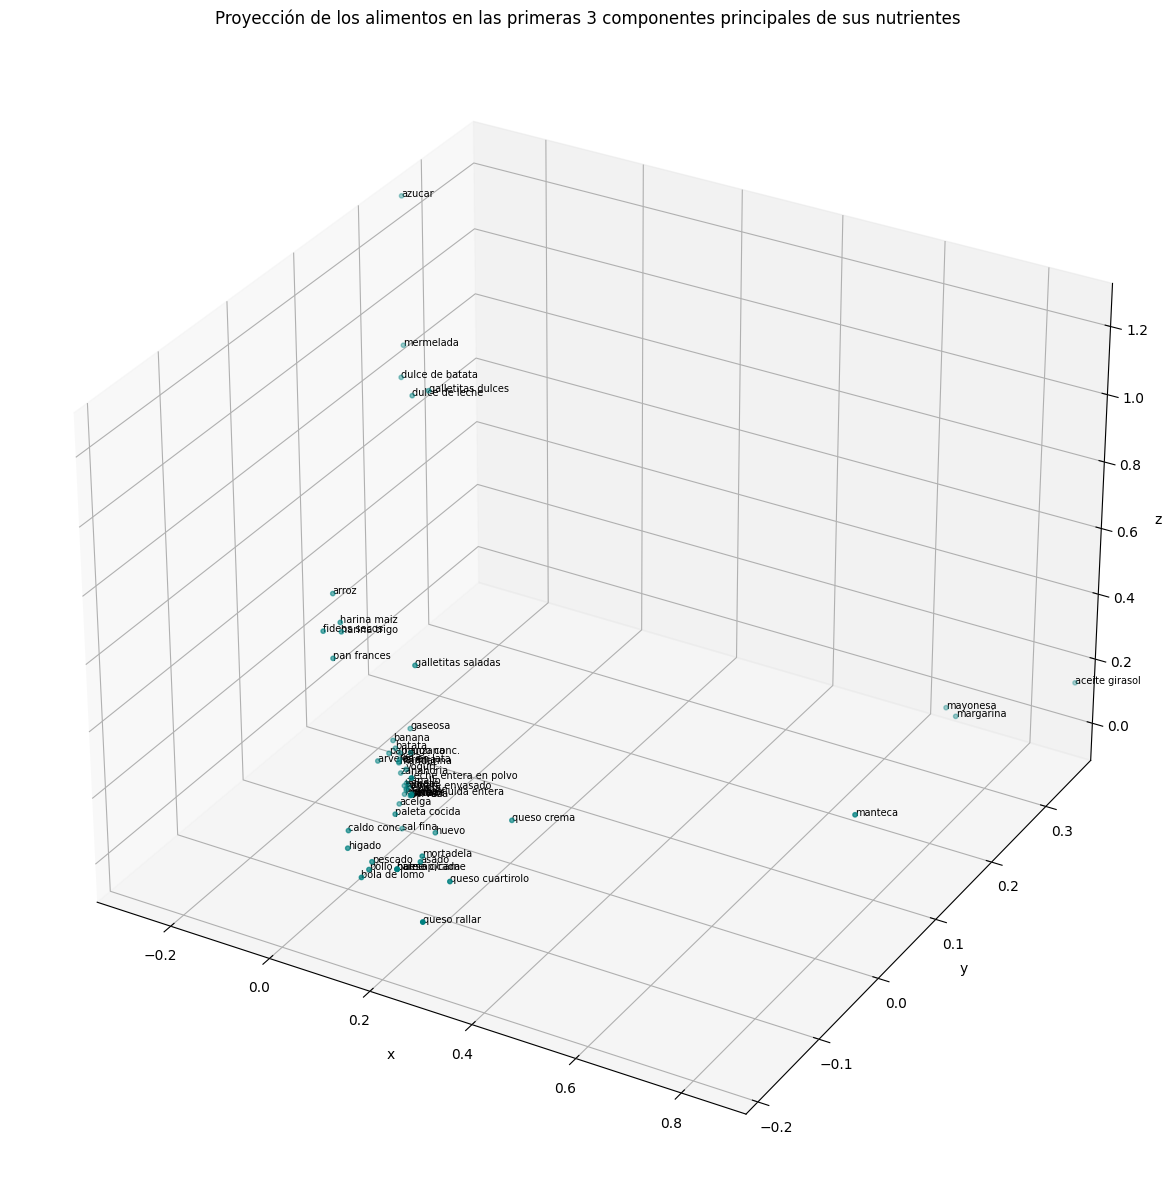

In [8]:
datos_proyectados_3dim = proyectar_datos_pca(tabla_nutricional_por_gramo, 3)

plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(datos_proyectados_3dim.iloc[:, 0], datos_proyectados_3dim.iloc[:, 1], datos_proyectados_3dim.iloc[:, 2], color='teal', marker='o', s=10)
for i in range(0, datos_proyectados_3dim.shape[0]):
    ax.text(
        datos_proyectados_3dim.iloc[i, 0],
        datos_proyectados_3dim.iloc[i, 1],
        datos_proyectados_3dim.iloc[i, 2],
        datos_proyectados_3dim.index[i],
        size=7,
        zorder=1,
        color='k'
    )


plt.title('Proyección de los alimentos en las primeras 3 componentes principales de sus nutrientes')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(min(datos_proyectados_3dim.iloc[:, 0]), max(datos_proyectados_3dim.iloc[:, 0]))
ax.set_ylim(min(datos_proyectados_3dim.iloc[:, 1]), max(datos_proyectados_3dim.iloc[:, 1]))
ax.set_zlim(min(datos_proyectados_3dim.iloc[:, 2]), max(datos_proyectados_3dim.iloc[:, 2]))

plt.show()

En el análisis de componentes principales (PCA) se revela una correspondencia notable entre los grupos alimentarios y los clusters identificados. Se distingue un cluster que incluye alimentos ricos en carbohidratos como pan, harina, fideos secos y arroz. Se puede ver un cluster cercano que corresponde a los alimentos altos en carbohidratos pero con mas niveles de azucares (azucar, dulce de batata, mermelada).

Por el extremo derecho se observa un cluster dominado por alimentos grasos, como aceite, manteca o mayonesa.

Se identifica también un clúster caracterizado por carnes y lácteos como asado, carne picada y quesos. Los quesos un poco mas direccionados al cluster de las grasas.

Luego hay un cluster que tiene una mezcla de varios grupos alimentarios, debido a que poseen cantidades variadas de todos los nutrientes (por ejemplo, las arvejas tienen proteína, carbohidratos, fibra, sodio; distinto al aceite que solo tiene grasas).

Este cluster contiene a las verduras y las frutas (más orientada hacia los azucares), los lácteos, y algunos productos de almacen que tengan una composición variada.

##  Aumentos de Precios

### **Consigna 4**
Proyectar los alimentos de la tabla de Consumidores libres en el espacio de generadores del ACP.

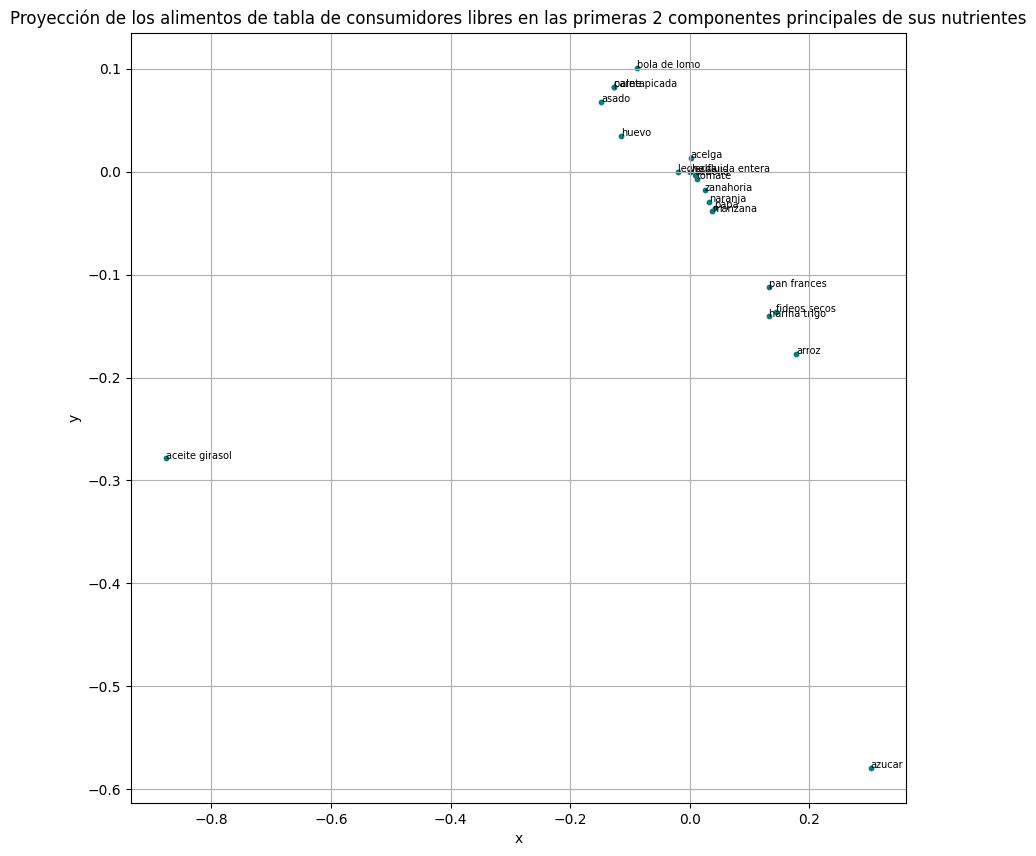

In [9]:
alimentos_tn_en_cl = ['aceite girasol', 'arroz', 'azucar', 'fideos secos', 'harina trigo', 'huevo', 'pan frances', 'leche fluida entera', 'yerba', 'zanahoria', 'tomate', 'cebolla', 'papa', 'acelga', 'naranja', 'manzana', 'bola de lomo', 'asado', 'paleta ', 'carne picada']

datos_proyectados_2dim = proyectar_datos_pca(tabla_nutricional_por_gramo.loc[alimentos_tn_en_cl], 2)

plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()

ax.scatter(datos_proyectados_2dim.iloc[:, 0], datos_proyectados_2dim.iloc[:, 1], color='teal', marker='o', s=10)
for i in range(0, datos_proyectados_2dim.shape[0]):
    ax.text(
        datos_proyectados_2dim.iloc[i, 0],
        datos_proyectados_2dim.iloc[i, 1],
        datos_proyectados_2dim.index[i],
        size=7,
        zorder=1,
        color='k'
    )

plt.title('Proyección de los alimentos de tabla de consumidores libres en las primeras 2 componentes principales de sus nutrientes')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

Proyectamos los alimentos de la tabla de consumidores libres en 2 dimensiones porque hay outliers, como el azúcar y el aceite, que hacen menos legible el grafico en 3 componentes. Aunque se haga la proyección con menos información, los alimentos igual se agrupan claramente por similaridad en su composición nutricional.

Se observa que ocurre un fenómeno similar al análisis anterior, con la presencia de clusters más discernibles y menos complejidad debido a la selección reducida de alimentos. En particular, se identifican los clusters de carbohidratos sin azúcares (pan, harina, fideos, arroz), un cluster de frutas  y vegetales (zanahoria, cebolla, naranja, etc.) y otro de carnes y lácteos (asado, carne picada y bola de lomo, huevos y leche). Notamos que el azúcar y el aceite se encuentran muy lejanos del resto de los puntos, ya que su composición está dada por solo un nutriente y entonces es muy diferente al resto.

#  Mínimos Cuadrados

###**Consigna 5**
Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.

In [10]:
tabla_cl = pd.read_csv('datos/consumidores_libres.csv', delimiter=';', index_col="PRODUCTOS")
tabla_cl = tabla_cl.drop("BERENJENAS")

tabla_cl.head()

,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
PRODUCTOS,,,,,,
ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0


La tabla de consumidores libres representa la evolución mensual del precio de alimentos seleccionados que son consumidos cotidianamente por los argentinos. Nosotros queremos evaluar el aumento de los nutrientes presentes en estos alimentos, por lo que debemos usar la tabla nutricional.

Notamos que todos los alimentos en la tabla de consumidores libres, excepto la berenjena, también están en la tabla nutricional, por lo que quitamos esta excepción. Además, cambiamos los nombres para que queden igual que en la tabla nutricional y mostramos los precios por 1 gramo de cada alimento.

In [11]:
def armar_tabla_cl_por_gramo(tabla_cl):
    """
    Cambia la tabla de consumidores libres para que se represente los precios de un gramo de cada alimento.

    Parámetros:
        tabla_cl: DataFrame que contiene la evolución de precios de una cantidad arbitraria de los alimentos.

    Devuelve:
        tabla_cl_por_gramo: DataFrame que contiene la evolución de precios de un gramo los alimentos.
    """
    # Hacemos una copia de la tabla cl, para no modificar la original
    tabla_cl_por_gramo = tabla_cl.copy()

    # Dividimos todos los nutrientes la cantidad total del alimento que se consume
    tabla_cl_por_gramo = tabla_cl_por_gramo.div(tabla_cl_por_gramo['Cantidad'], axis=0)
    tabla_cl_por_gramo = tabla_cl_por_gramo.drop(columns=['Cantidad'])

    return tabla_cl_por_gramo

alimentos_cl = tabla_cl.index.values

traductor_alimentos = dict(zip(alimentos_cl, alimentos_tn_en_cl))
tabla_cl = tabla_cl.rename(index=traductor_alimentos)

tabla_cl_por_gramo = armar_tabla_cl_por_gramo(tabla_cl)

tabla_cl_por_gramo.head()

,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
PRODUCTOS,,,,,
aceite girasol,1.666667,2.066667,2.30,2.4,2.466667
arroz,1.650000,2.300000,2.80,3.1,3.550000
azucar,1.990000,2.050000,2.05,2.1,2.100000
fideos secos,3.200000,3.980000,4.30,4.4,4.580000
harina trigo,0.950000,1.250000,1.35,1.5,1.690000


In [12]:
tabla_nutricional_cl = tabla_nutricional.copy()
tabla_nutricional_cl = tabla_nutricional_cl.loc[alimentos_tn_en_cl]

tabla_nutricional_cl = armar_tabla_nutricional_por_gramo(tabla_nutricional_cl)
tabla_nutricional_cl = tabla_nutricional_cl[["HC (gr)", "Proteinas (gr)", "Grasas (gr)"]]

tabla_nutricional_cl.head()

,HC (gr),Proteinas (gr),Grasas (gr)
Alimento,,,
aceite girasol,0.000000,0.000000,1.000000
arroz,0.791944,0.068889,0.000000
azucar,1.000000,0.000000,0.000000
fideos secos,0.725893,0.127679,0.015714
harina trigo,0.687111,0.102889,0.026889


Dado que disponemos de ambas tablas (la de Consumidores Libres y la Nutricional) con datos normalizados a 1 gramo, podemos combinarlas para analizar los incrementos de precio relativos a cada nutriente por cada gramo.

In [13]:
def armar_tabla_nutriente(tabla_cl, tabla_nutricional_cl, nutriente):
    """
    Parametros:
    tabla_cl: tabla de Consumidores Libres
    tabla_nutricional_cl: tabla nutricional filtrando los alimentos que no estan en la tabla de Consumidores libres.
    Y filtrando las columnas que no son HC, Proteina y Grasa pertenecientes a la tabla nutricional original y a la de consumidores libres
    nutriente: HC, proteina o grasa

    Devuelve:
    tabla_nutriente: tabla con los aumentos de precio segun nutriente
    """
    tabla_nutriente = tabla_cl.merge(tabla_nutricional_cl[f'{nutriente} (gr)'], left_index=True, right_index=True)
    tabla_nutriente = tabla_nutriente.multiply(tabla_nutriente[f'{nutriente} (gr)'], axis=0)

    return tabla_nutriente

fechas = list(tabla_cl_por_gramo.columns.values)
print("Tabla de evolución del precio del HC en un gramo de cada alimento")
armar_tabla_nutriente(tabla_cl_por_gramo, tabla_nutricional_cl, 'HC').head()

Tabla de evolución del precio del HC en un gramo de cada alimento


,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,HC (gr)
aceite girasol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
arroz,1.306708,1.821472,2.217444,2.455028,2.811403,0.627176
azucar,1.990000,2.050000,2.050000,2.100000,2.100000,1.000000
fideos secos,2.322857,2.889054,3.121339,3.193929,3.324589,0.526920
harina trigo,0.652756,0.858889,0.927600,1.030667,1.161218,0.472122


Debido a que los datos no siguen una relación lineal exacta, realizamos una regresión lineal para obtener la recta que mejor se ajuste, permitiendo así estudiar el crecimiento aproximado de los precios

Ordenada al origen y pendiente de recta de regresión sobre la evolución de los precios del HC contenido en el arroz:
1.3938222222222219 0.3642944444444446


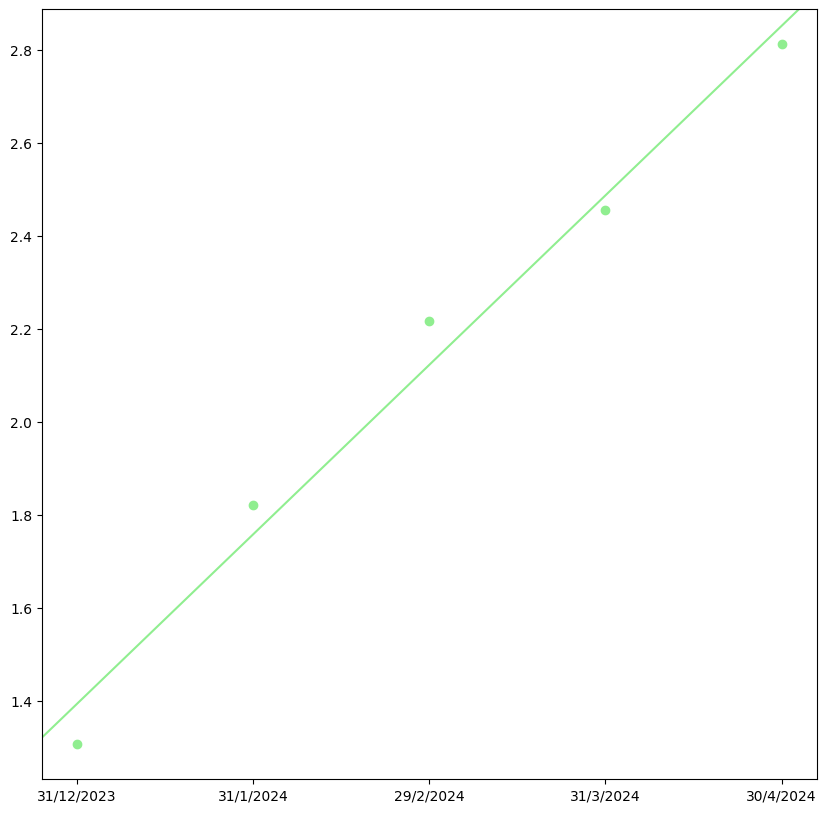

In [14]:
def armar_recta_regresion(x, y):
    """
    Calcula la recta de regresión lineal a partir de los datos de entrada.

    Parametros:
    x: Array de entrada que representa las variables independientes.
    y: Array de entrada que representa las variables dependientes.

    Devuelve:
    ord_origen: término constante (ordenada al origen).
    pendiente: pendiente de la recta de regresión.
    """
    cant_puntos = np.shape(y)[0]
    columna_unos = np.ones((cant_puntos, 1))
    # Como las fechas de cierre son en el último día de cada mes, decidimos simplificar que cada fecha es el mismo día de cada mes
    columna_fechas = np.arange(5).reshape((5, 1))
    M = np.column_stack((columna_unos, columna_fechas))
    mt_m = M.T @ M
    b = M.T @ y

    ord_origen, pendiente = np.linalg.solve(mt_m, b)
    return ord_origen, pendiente

tabla_hc = armar_tabla_nutriente(tabla_cl_por_gramo, tabla_nutricional_cl, 'HC')
evolucion_precio_hc_arroz =  tabla_hc.loc['arroz']

ord_origen, pendiente = armar_recta_regresion(fechas, evolucion_precio_hc_arroz[fechas])
print("Ordenada al origen y pendiente de recta de regresión sobre la evolución de los precios del HC contenido en el arroz:")
print(ord_origen, pendiente)

estilo_nutriente = {'HC': ('lightgreen', 'o'), 'Proteinas': ('teal', '*'), 'Grasas': ('salmon', 'd')}

fig, ax = plt.subplots()
plt.scatter(fechas, evolucion_precio_hc_arroz.drop('HC (gr)'), color='lightgreen', marker='o')
ax.axline((0, ord_origen), slope=pendiente, color=estilo_nutriente['HC'][0], label=estilo_nutriente['HC'][1])
plt.show()

Realizamos, para cada alimento, una curva representando al aumento de cada nutriente

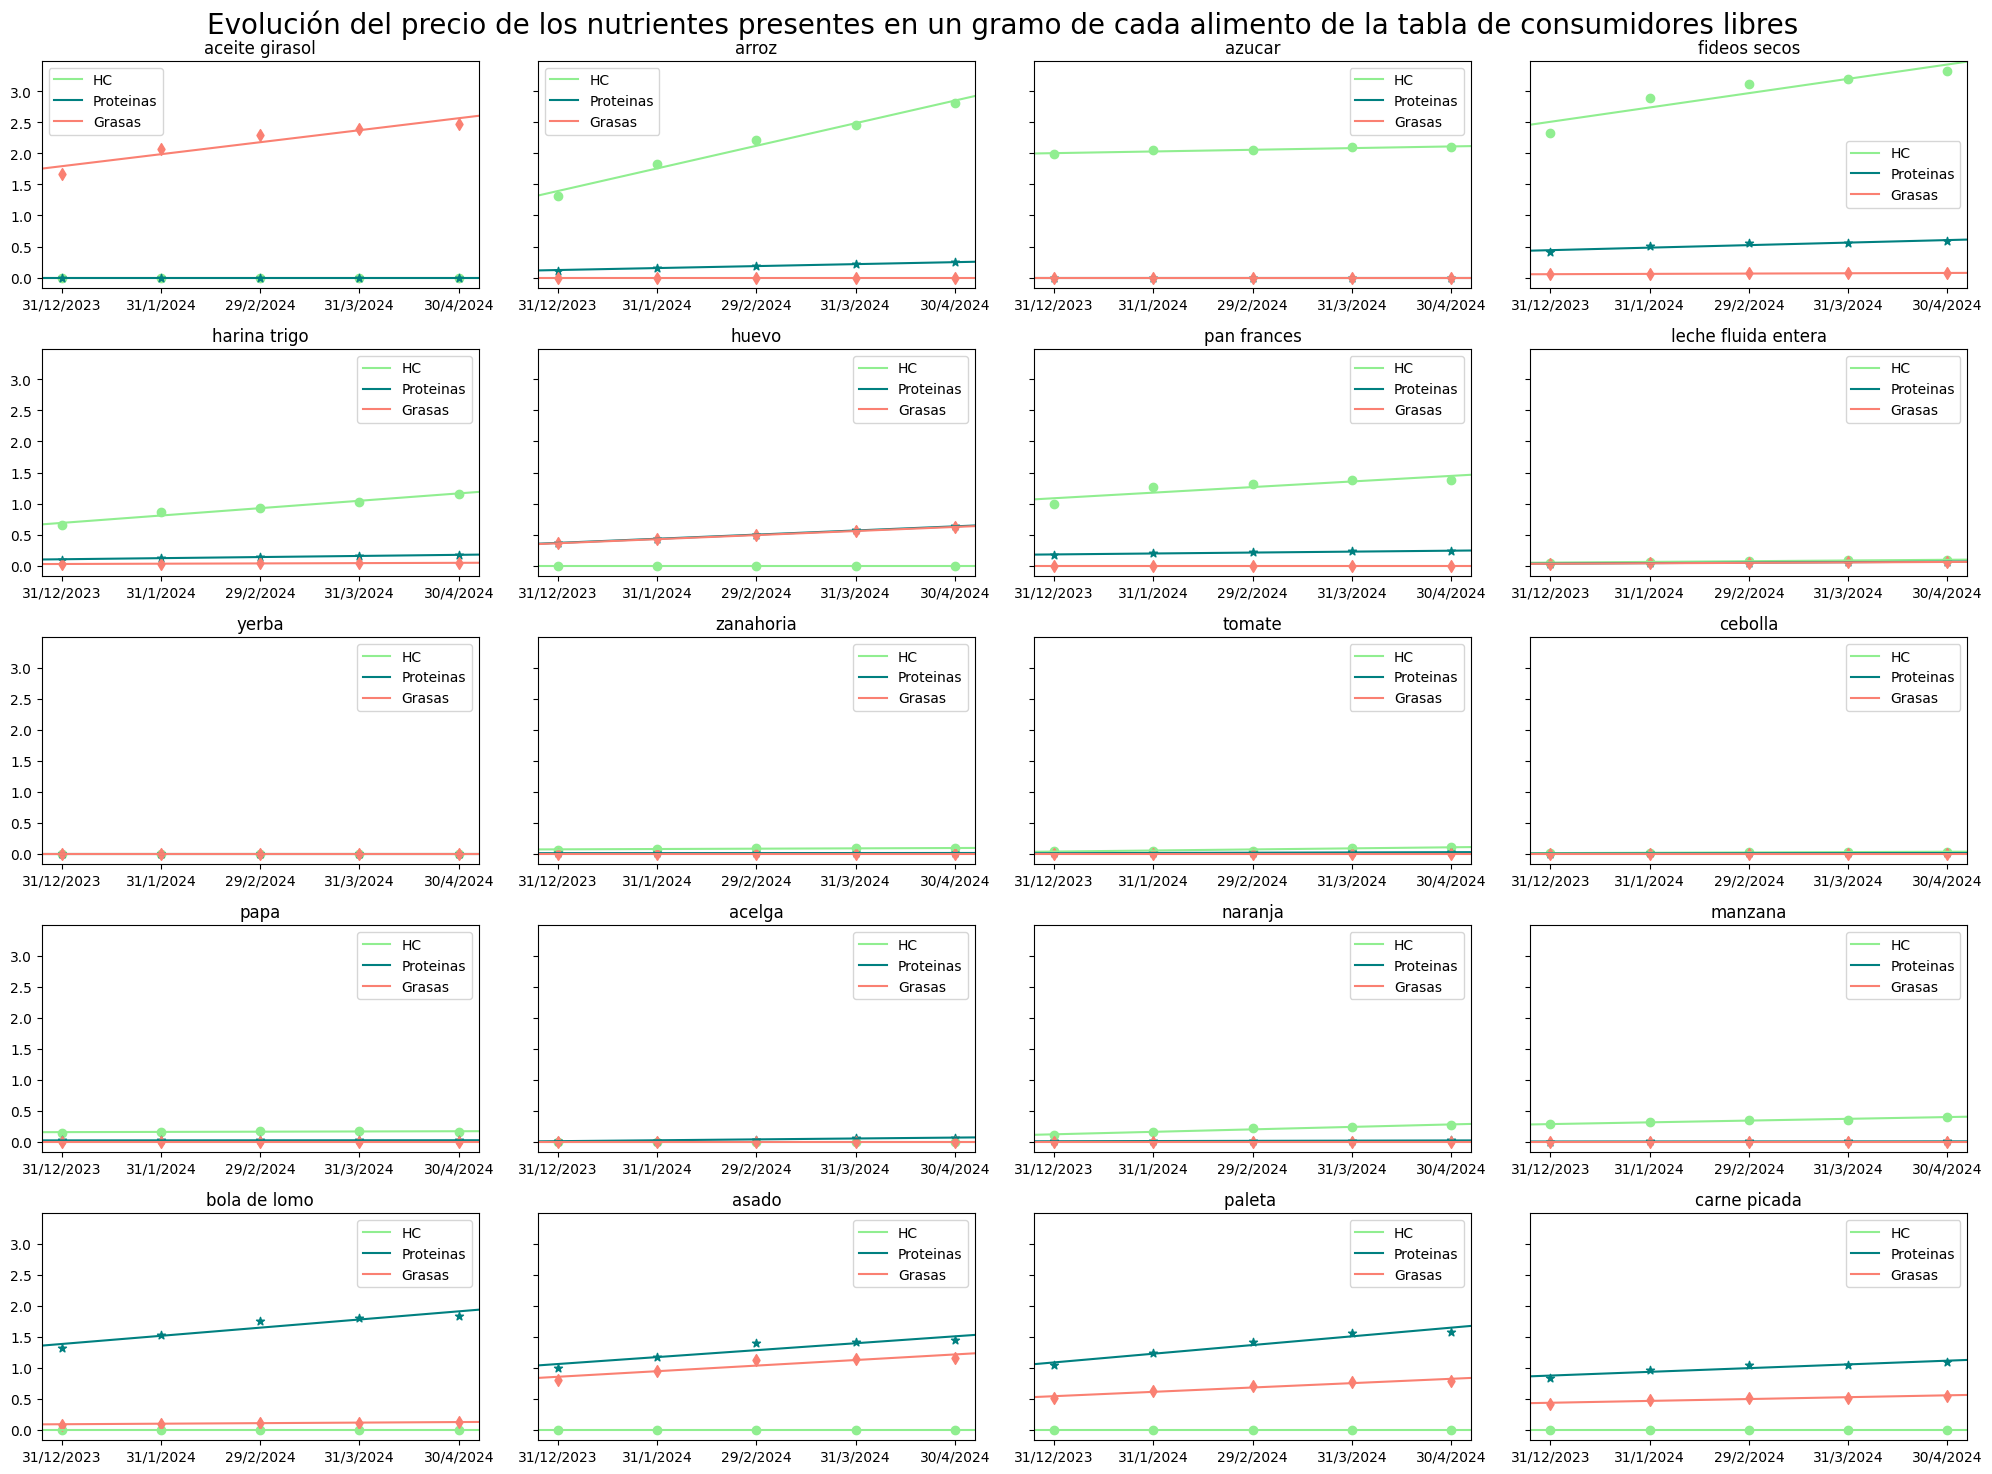

In [15]:
# Grafico cada alimento por separado
fig, axes = plt.subplots(5, 4, figsize=(20, 15), sharey=True)
axes = axes.flatten()

for nutriente in ['HC', 'Proteinas', 'Grasas']:

    tabla_nutriente = armar_tabla_nutriente(tabla_cl_por_gramo, tabla_nutricional_cl, nutriente)
    i=0

    for alimento_cl in alimentos_tn_en_cl:
        tabla_precio_nutriente_alimento = tabla_nutriente.loc[alimento_cl]

        ax = axes[i]
        ord_origen, pendiente = armar_recta_regresion(fechas, tabla_precio_nutriente_alimento[fechas])

        ax.scatter(fechas, tabla_precio_nutriente_alimento[fechas], color=estilo_nutriente[nutriente][0], marker=estilo_nutriente[nutriente][1])
        ax.axline((0, ord_origen), slope=pendiente, color=estilo_nutriente[nutriente][0], label=nutriente)
        ax.set_title(alimento_cl)
        ax.legend()

        i+=1


plt.suptitle(f"Evolución del precio de los nutrientes presentes en un gramo de cada alimento de la tabla de consumidores libres", fontsize=20)
plt.tight_layout()
plt.show()

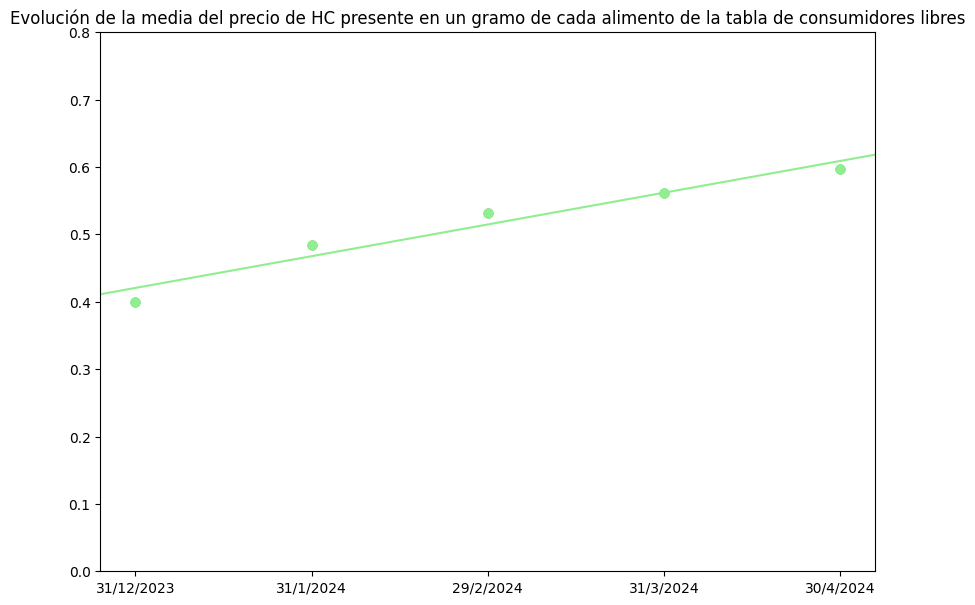

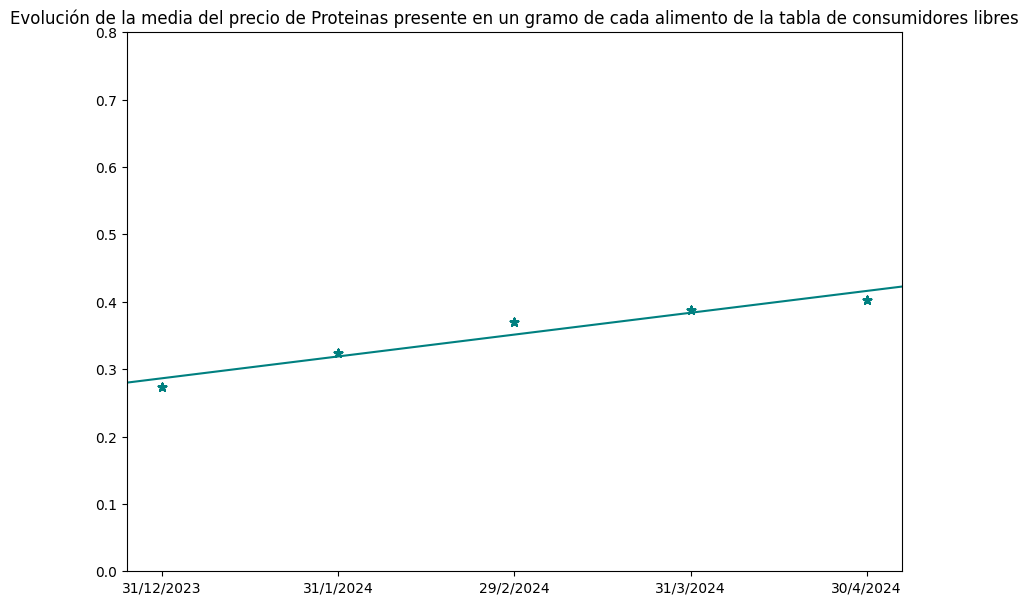

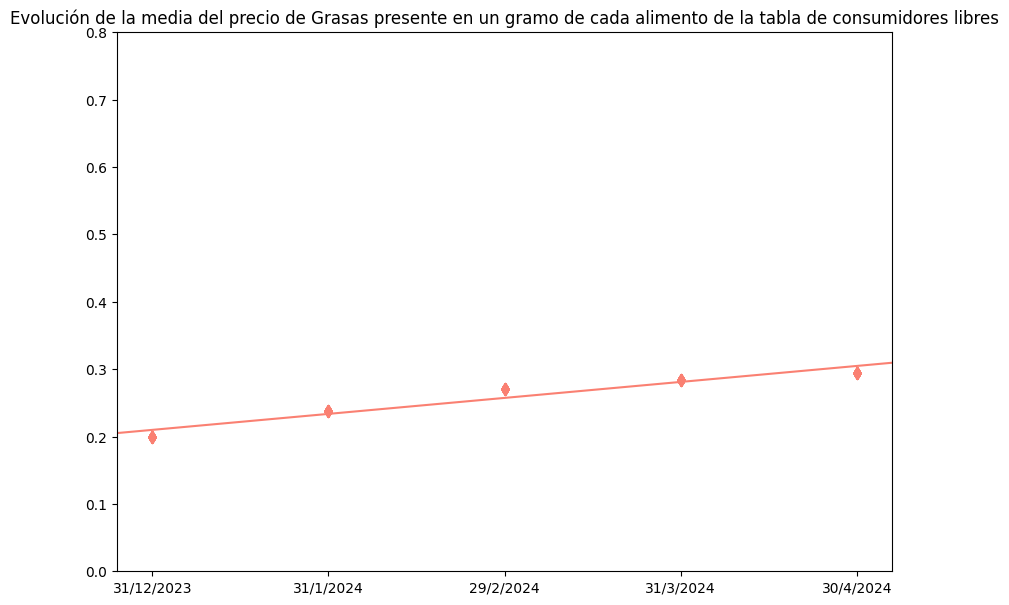

In [16]:
# Grafico todos los alimentos juntos
for nutriente in ['HC', 'Proteinas', 'Grasas']:
    plt.figure(figsize=(10, 7))

    for alimento_cl in alimentos_tn_en_cl:
        tabla_nutriente = armar_tabla_nutriente(tabla_cl_por_gramo, tabla_nutricional_cl, nutriente)
        tabla_nutriente_alimento = tabla_nutriente.loc[alimento_cl]

        plt.scatter(fechas, tabla_nutriente[fechas].mean(), color=estilo_nutriente[nutriente][0], marker=estilo_nutriente[nutriente][1])

    ord_origen, pendiente = armar_recta_regresion(fechas, tabla_nutriente[fechas].mean())
    plt.axline((0, ord_origen), slope=pendiente, color=estilo_nutriente[nutriente][0])
    plt.title(f"Evolución de la media del precio de {nutriente} presente en un gramo de cada alimento de la tabla de consumidores libres", fontsize=12)
    plt.ylim(0,.8)
    plt.show()

###**Consigna 6**
Comparar el aumento de la carne en comparación con los otros
rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta individual con respecto a la tabla de metas de la OMS?

Para estudiar el aumento de la carne en comparacion con otros rubros, primero calculamos el porcentaje de aumento para cada alimento; luego separamos los alimentos por rubro, y finalmente buscamos el promedio de aumento por cada rubro.

In [17]:
tabla_cl['Aumento (%)'] = tabla_cl[fechas[-1]] * 100 / tabla_cl[fechas[0]] - 100

alimentos_cl_almacen = tabla_cl.loc[alimentos_tn_en_cl][:9]
alimentos_cl_frutayverdura = tabla_cl.loc[alimentos_tn_en_cl[9:16]]
alimentos_cl_carnes = tabla_cl.loc[alimentos_tn_en_cl[16:]]

almacen = alimentos_cl_almacen.index.values
fruta_y_verdura = alimentos_cl_frutayverdura.index.values
carnes = alimentos_cl_carnes.index.values

# Cálculo del promedio de aumento de cada rubro
promedio_carnes = alimentos_cl_carnes['Aumento (%)'].mean()
promedio_fruta_y_verdura = alimentos_cl_frutayverdura['Aumento (%)'].mean()
promedio_almacen = alimentos_cl_almacen['Aumento (%)'].mean()

print(f"El promedio de aumento de las carnes es de {promedio_carnes}%")
print(f"El promedio de aumento de la fruta y verdura es de {promedio_fruta_y_verdura}%")
print(f"El promedio de aumento de los productos de almacen es de {promedio_almacen}%")

El promedio de aumento de las carnes es de 41.47752635655862%
El promedio de aumento de la fruta y verdura es de 126.9266592239024%
El promedio de aumento de los productos de almacen es de 64.35086273816108%


Luego, estudiamos la ingesta de la poblacion después de disminuir el porcentaje de carne.
Para eso, en principio modificamos la tabla nutricional, adaptándola a los nuevos márgenes de consumo, y repetimos el procedimiento de la consigna 2, en la que revisamos si una dieta era balanceada en el marco de la OMS.

In [18]:
# Quitamos el porcentaje de carnes de la tabla nutricional

tabla_nut_menos_carne = tabla_nutricional.copy()

carnes_tn = ['asado', 'paleta ', 'hueso c/carne', 'carne picada', 'bola de lomo', 'higado', 'pollo', 'pescado', 'mortadela', 'paleta cocida']


tabla_nut_menos_carne.loc[carnes_tn] *= 1 - promedio_carnes/100

esta_dieta_balanceada(tabla_nut_menos_carne)

Grasas no cumple con los requerimientos de la OMS. Rango recomendado: 15% a 30% de la energía total. Valor obtenido: 12.154291899131971% de la energía total.
Proteinas no cumple con los requerimientos de la OMS. Rango recomendado: 10% a 15% de la energía total. Valor obtenido: 16.31986368429444% de la energía total.
Sodio no cumple con los requerimientos de la OMS. Rango recomendado: menos de 2 gramos. Valor obtenido: 3.260777336361219 gramos.
Fibra no cumple con los requerimientos de la OMS. Rango recomendado: más de 25 gramos. Valor obtenido: 21.26 gramos.


False

#  Reemplazos Dietarios

###**Consigna 7**
Proponer dos alimentos de la tabla 3 que lleguen a reemplazar la disminución del 18.5% de la carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se pone como restricción en la elección, que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento de la carne.

Modificamos la tabla nutricional para ajustarla a los nuevos niveles de consumo.

In [19]:
tabla_nut_menos_carne = tabla_nutricional.copy()
hc_original = tabla_nut_menos_carne['HC (gr)'].sum()
prote_original = tabla_nut_menos_carne['Proteinas (gr)'].sum()
grasas_original = tabla_nut_menos_carne['Grasas (gr)'].sum()

# actualizamos en la tabla todas las carnes con la disminucion del 18.5%
aumento_carne = 18.5
tabla_nut_menos_carne.loc[carnes_tn] *= 1 - aumento_carne/100

# Calculo la perdida de nutrientes por esta disminución
hc_despues = tabla_nut_menos_carne['HC (gr)'].sum()
prote_despues = tabla_nut_menos_carne['Proteinas (gr)'].sum()
grasas_despues = tabla_nut_menos_carne['Grasas (gr)'].sum()

hc_perdido = hc_original - hc_despues
proteina_perdida = prote_original - prote_despues
grasa_perdida = grasas_original - grasas_despues

print(f"HC perdido: {hc_perdido}")
print(f"Proteina perdida: {proteina_perdida}")
print(f"Grasa perdida: {grasa_perdida}")

tabla_nut_menos_carne.head()

HC perdido: 0.12024999999999864
Proteina perdida: 8.41749999999999
Grasa perdida: 3.231950000000012


,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (g),Ca (g),Fe (g),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
Alimento,,,,,,,,,,,,
leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0
leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0
yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0
queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0
queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0


In [20]:
cant_alimentos = tabla_nutricional.loc[tabla_cl.index, "Cantidad (gr/ml)"] * 30
proporcion_alimentos = cant_alimentos.div(tabla_cl["Cantidad"])
tabla_cl_proporcional = tabla_cl.mul(proporcion_alimentos, axis=0)

precio_target = tabla_cl_proporcional.loc[carnes, fechas[-1]].mean() / 2

print("Precio máximo para reemplazar nutrientes: ", precio_target)

Precio máximo para reemplazar nutrientes:  3557.25


Utilizamos PCA para identificar alimentos con valores nutricionales similares.

Dado que se debía reducir el consumo de carne en general, unificamos los datos nutricionales de todas las carnes en un punto medio que represente las características más comunes entre ellas. Luego, buscamos alimentos que se asemejen lo más posible a este punto medio de las carnes

In [21]:
def calcular_distancia_euclidea(x1,x2):
    """
    Calcula la distancia euclidea entre dos vectores

    Parámetros:
        x1: vector de longitud n
        x2: vector de longitud n

    Devuelve:
        dist: valor de la distancia euclidea
    """
    dist = 0
    for x1_i, x2_i in zip(x1,x2):
      dist += (x1_i - x2_i)**2

    dist = np.sqrt(dist)
    return dist

# Buscamos el PCA para toda la tabla excepto las carnes
tabla_nutricional_por_gramo = armar_tabla_nutricional_por_gramo(tabla_nut_menos_carne)

# PCA con 3 componentes principales
datos_proyectados_3 = proyectar_datos_pca(tabla_nutricional_por_gramo, 3)
carnes_proyectadas = datos_proyectados_3.loc[carnes]

punto_medio = carnes_proyectadas.mean()

# Calcular distancias para cada fila en `datos_proyectados_3`
proyeccion_sin_carnes = datos_proyectados_3[~datos_proyectados_3.index.isin(carnes)]
proyeccion_sin_carnes["Distancia a punto_medio"] = proyeccion_sin_carnes.apply(lambda row: calcular_distancia_euclidea(row[[0, 1, 2]], punto_medio), axis=1)

proyeccion_sin_carnes_cl = proyeccion_sin_carnes.loc[[alimento for alimento in alimentos_tn_en_cl if alimento not in ['bola de lomo', 'asado', 'paleta ', 'carne picada']]]
proyeccion_sin_carnes_cl = proyeccion_sin_carnes_cl.sort_values(by=['Distancia a punto_medio'])

print("Alimentos ordenados de más cercano a más lejano a la carne según la proyección")
proyeccion_sin_carnes_cl.head()

Alimentos ordenados de más cercano a más lejano a la carne según la proyección


<ipython-input-21-68f7df899a40>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyeccion_sin_carnes["Distancia a punto_medio"] = proyeccion_sin_carnes.apply(lambda row: calcular_distancia_euclidea(row[[0, 1, 2]], punto_medio), axis=1)


,0,1,2,Distancia a punto_medio
Alimento,,,,
huevo,0.117574,-0.053282,0.031238,0.069773
leche fluida entera,0.020923,-0.015099,0.039141,0.148209
acelga,-0.001163,-0.018038,0.002964,0.166972
yerba,0.000000,0.000000,0.000000,0.178621
cebolla,-0.007077,-0.002331,0.015545,0.179106


In [22]:
tabla_cl_por_gramo = armar_tabla_cl_por_gramo(tabla_cl)

def evaluar_reemplazo_carne(alimento, solo_proteina=False):
    """
    Evalúa que el alimento candidato cubra el valor nutricional perdido por la caída de consumo de carne

    Parámetros:
        alimento: str

    Devuelve:
        precio_reemplazo < precio_target (bool): El precio de reemplazar la carne por el alimento es adecuado
    """

    nutr_en_gramo = tabla_nutricional_por_gramo.loc[alimento, ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)']].values

    cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo

    if solo_proteina:
        precio_reemplazo = (cant_necesaria_reemplazo * tabla_cl_por_gramo.loc[alimento, fechas[-1]])[1]
    else:
        precio_reemplazo = max(cant_necesaria_reemplazo * tabla_cl_por_gramo.loc[alimento, fechas[-1]])

    return precio_reemplazo < precio_target


proyeccion_sin_carnes_cl["Reemplaza a la carne"] = proyeccion_sin_carnes_cl.index.map(evaluar_reemplazo_carne)
proyeccion_sin_carnes_cl[proyeccion_sin_carnes_cl["Reemplaza a la carne"] == True]

<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo
<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo
<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo
<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo
<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_necesaria_reemplazo = [hc_perdido, proteina_perdida, grasa_perdida] / nutr_en_gramo
<ipython-input-22-93efad300014>:16: RuntimeWarning: divide by zero encountered in divide
  cant_nece

,0,1,2,Distancia a punto_medio,Reemplaza a la carne
Alimento,,,,,
leche fluida entera,0.020923,-0.015099,0.039141,0.148209,True
harina trigo,-0.120890,-0.011479,0.463124,0.499369,True
fideos secos,-0.133255,-0.029750,0.489201,0.523938,True


En conclusion, los alimentos que logran cubrir los nutrientes perdidos por la carne, sin superar el 50% del aumento, son la leche, la harina de trigo y los fideos.

Cabe aclarar que muchos alimentos cercanos a la carne no la reemplazan ya que no tienen algún nutriente. Por ejemplo, el huevo tiene 0 gramos de carbohidratos pero necesitamos una suma pequeña. Esto explica también los warnings de divisiones por 0 de Jupyter.

###**Consigna 8**
Proponer dos alimentos de la tabla 1 lejanos en el sentido de distancia Euclideana del espacio de generadores del ACP, que reemplacen la cantidad de proteína perdida. Se pueden usar todos los alimentos de la tabla 1. Corroborar como varían los objetivos ahora en la tabla de metas de la OMS en cada caso.

Primero, filtramos los alimentos por los que cubren la pérdida de proteinas correspondiente a la caída de consumo de carne cumpliendo los requerimientos de precio. Luego, obtenemos la cantidad de cada alimento necesaria para cubrirlo. Ordenamos los alimentos de más lejano a más cercano a la carne

In [23]:
proyeccion_sin_carnes_cl["Reemplaza a la carne"] = proyeccion_sin_carnes_cl.index.to_series().apply(lambda alimento: evaluar_reemplazo_carne(alimento, solo_proteina=True))
proyeccion_sin_carnes_cl = proyeccion_sin_carnes_cl[proyeccion_sin_carnes_cl["Reemplaza a la carne"] == True]

prot_en_gramo = tabla_nutricional_por_gramo.loc[proyeccion_sin_carnes_cl.index]
prot_en_gramo = prot_en_gramo['Proteinas (gr)'].values

cant_necesaria_reemplazo = proteina_perdida / prot_en_gramo

proyeccion_sin_carnes_cl["Cantidad necesaria"] = cant_necesaria_reemplazo
proyeccion_sin_carnes_cl = proyeccion_sin_carnes_cl.sort_values(by=['Distancia a punto_medio'], ascending=False)

proyeccion_sin_carnes_cl.head()


<ipython-input-23-ffa76ff13be7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proyeccion_sin_carnes_cl["Cantidad necesaria"] = cant_necesaria_reemplazo


,0,1,2,Distancia a punto_medio,Reemplaza a la carne,Cantidad necesaria
Alimento,,,,,,
arroz,-0.165442,0.009738,0.525007,0.578130,True,122.189516
fideos secos,-0.133255,-0.029750,0.489201,0.523938,True,65.927273
harina trigo,-0.120890,-0.011479,0.463124,0.499369,True,81.811555
pan frances,-0.122599,-0.023794,0.402148,0.447204,True,84.175000
papa,-0.038374,-0.004406,0.118712,0.214342,True,311.910599


Vemos que los alimentos más lejanos a la carne cumplen esto son el arroz y los fideos. Utilizamos la función del ejercicio 2 para verificar si en este caso se cumplen los requerimientos de la OMS.

In [24]:
tabla_nutricional_reemplazo = tabla_nut_menos_carne.copy()

cant_necesaria_arroz = proyeccion_sin_carnes_cl.loc['arroz', 'Cantidad necesaria']
cant_necesaria_fideos = proyeccion_sin_carnes_cl.loc['fideos secos', 'Cantidad necesaria']

nutrientes_arroz = tabla_nutricional_reemplazo.loc['arroz']
nutrientes_fideos = tabla_nutricional_reemplazo.loc['fideos secos']

cant_original_arroz = nutrientes_arroz['Cantidad (gr/ml)']
cant_original_fideos = nutrientes_fideos['Cantidad (gr/ml)']


tabla_nutricional_reemplazo.loc['arroz'] = (nutrientes_arroz + cant_necesaria_arroz) * nutrientes_arroz / cant_original_arroz
tabla_nutricional_reemplazo.loc['fideos secos'] = (nutrientes_fideos + cant_necesaria_fideos) * nutrientes_fideos / cant_original_fideos

esta_dieta_balanceada(tabla_nutricional_reemplazo)

Grasas no cumple con los requerimientos de la OMS. Rango recomendado: 15% a 30% de la energía total. Valor obtenido: 10.202979305798614% de la energía total.
Proteinas no cumple con los requerimientos de la OMS. Rango recomendado: 10% a 15% de la energía total. Valor obtenido: 15.513219195947817% de la energía total.
Sodio no cumple con los requerimientos de la OMS. Rango recomendado: menos de 2 gramos. Valor obtenido: 3.3075411717360703 gramos.
Fibra no cumple con los requerimientos de la OMS. Rango recomendado: más de 25 gramos. Valor obtenido: 23.8780744804031 gramos.


False

En relación a los resultados del ejercicio 2, la proteína y las grasas bajan en proporción a los carbohidratos. A pesar de que reemplazamos la cantidad en gramos de proteínas, al modificar la composición nutricional las proporciones cambian.